In [ ]:
#Install Selenium and chromedriver
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver/usr/bin
!pip install selenium

In [2]:
#Setup Selenium options and import packages
import pandas as pd
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

options=webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [5]:
from google.colab import files

csv_cars = files.upload()

Saving All_F1_Cars_Of_The_History.csv to All_F1_Cars_Of_The_History.csv


In [6]:
data = pd.read_csv("All_F1_Cars_Of_The_History.csv", parse_dates=True)
data


,Chassis,Country,Team,Year
0,Alfa Romeo 158,italy,Team Alfa Romeo,1950
1,Alfa Romeo 159,italy,Team Alfa Romeo,1950
2,Cooper T12,united kingdom,Cooper Car Company,1950
3,Ferrari 125,italy,Scuderia Ferrari SpA,1950
4,Ferrari 166 F2,italy,Scuderia Ferrari SpA,1950
...,...,...,...,...
1402,Haas VF-22 Ferrari,united states,Haas F1 Team,2022
1403,McLaren MCL36 Mercedes,united kingdom,McLaren International Ltd,2022
1404,Mercedes F1 W13 E Performance,germany,Mercedes AMG F1,2022
1405,Red Bull RB18 RBPT,united kingdom,Red Bull Racing,2022


In [78]:
# Creating a webdriver instance
driver=webdriver.Chrome('chromedriver',options=options)

<selenium.webdriver.remote.webelement.WebElement (session="2041b87d6116e10224cfa9694ee26116", element="6b8e63d4-9f16-46a1-b72a-8ddf0cc02795")>
<selenium.webdriver.remote.webelement.WebElement (session="2041b87d6116e10224cfa9694ee26116", element="ad685018-9115-41e3-8e99-bcd64642b2fd")>


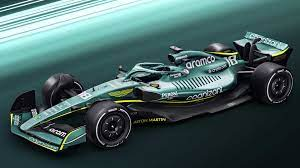

In [79]:
index=1400
search_name= data.loc[index,'Chassis']+" "+data.loc[index,'Team']+" "+str(data.loc[index,'Year'])
driver.get('https://images.google.com/')
driver.maximize_window()
search_bar = driver.find_element('xpath','//*[@id="sbtc"]/div/div[2]/input')
search_bar.send_keys(search_name)
search_bar.send_keys(Keys.ENTER)

img_before_click = driver.find_element("xpath",'//*[@id="islrg"]/div[1]/div[' +str(1) + ']/a[1]/div[1]/img')

img_before_click.click()

img_after_click = driver.find_element("xpath",'//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img')

img_src = img_after_click.get_attribute('src')
print(img_src)
driver.close()

In [46]:
# Function for scrolling to the bottom of Google Images results
def scroll_to_bottom():
 
    last_height = driver.execute_script("return document.body.scrollHeight")
 
    while True:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
 
        # waiting for the results to load
        # Increase the sleep time if your internet is slow
        time.sleep(3)
 
        new_height = driver.execute_script('return document.body.scrollHeight')
 
        # click on "Show more results" (if exists)
        try:
            driver.find_element("css_selector",".YstHxe input").click()
 
            # waiting for the results to load
            # Increase the sleep time if your internet is slow
            time.sleep(3)
 
        except:
            pass
 
        # checking if we have reached the bottom of the page
        if new_height == last_height:
            break
 
        last_height = new_height

In [48]:
def search_car(index):
  # What you enter here will be searched for in Google Images
  search_name= data.loc[index,'Chassis']+" "+data.loc[index,'Team']+" "+str(data.loc[index,'Year'])
  
  # Open Google Images in the browser
  driver.get('https://images.google.com/')

  # Maximize the screen
  driver.maximize_window()

  # Finding the search bar
  search_bar = driver.find_element('xpath','//*[@id="sbtc"]/div/div[2]/input')
 
  # Type the search query in the search bar
  search_bar.send_keys(search_name)
 
  # Pressing enter
  search_bar.send_keys(Keys.ENTER)

  # Calling the function
 
  # NOTE: If you only want to capture a few images,
  # there is no need to use the scroll_to_bottom() function.
  scroll_to_bottom()

  # Loop to capture and save each image
  for i in range(1, 150):
    
      # range(1, 151) will capture images 1 to 150 of the search results
      # You can change the range as per your need.
      try:
  
        # XPath of each image
          img_before_click = driver.find_element("xpath",'//*[@id="islrg"]/div[1]/div[' +str(i) + ']/a[1]/div[1]/img')
          img_cliked = img_before_click.click()
          img_after_click = img_cliked.find_element("xpath",'//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img')
          img_src = img_after_click.get_attribute('src')
          # Each new screenshot will automatically have its name updated
          print(img_src)
          # Just to avoid unwanted errors
          time.sleep(0.2)
  
      except:
          
          # if we can't find the XPath of an image, we skip to the next image
          continue
  
  # Finally, we close the driver
  driver.close()



  

In [50]:
index=1400
data.loc[index,'Chassis']+" "+data.loc[index,'Team']+" "+str(data.loc[index,'Year'])

'Aston Martin AMR22 Mercedes Aston Martin 2022'

In [ ]:
search_car(1400)